<a href="https://colab.research.google.com/github/morrea1/MANE-4962/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alex Morreale HW 3
RIN: 662024409

##Question 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


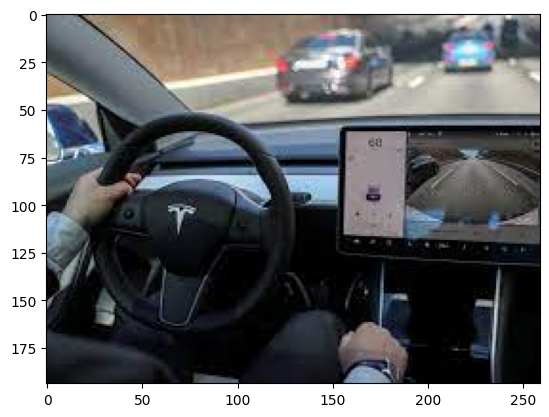

In [37]:
#load image

from skimage import io
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/hw3.jpg'

image = io.imread(file_path)


plt.imshow(image)
plt.show()

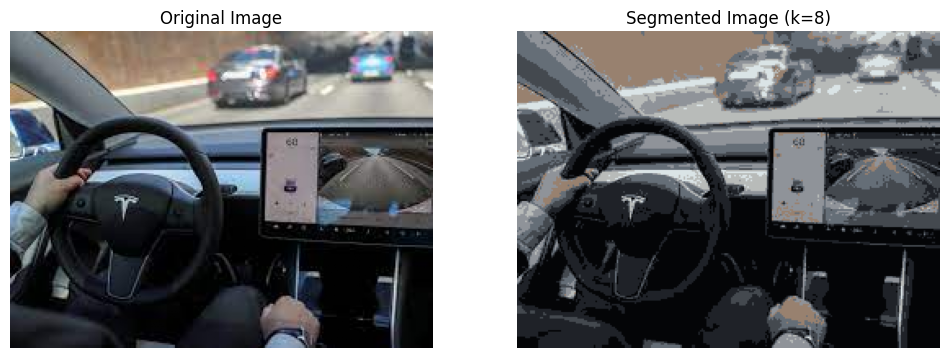

Cluster centers (colors): [[0.39848323 0.43229113 0.46934783]
 [0.12279242 0.13589015 0.1590207 ]
 [0.56372481 0.57770741 0.60289517]
 [0.26712678 0.28697045 0.31067977]
 [0.01902584 0.02287453 0.03123773]
 [0.59668623 0.50739117 0.43748064]
 [0.85840875 0.8943552  0.90454751]
 [0.7222306  0.73449202 0.72621691]]


In [38]:
#reshape

from sklearn.cluster import KMeans
import numpy as np

#normalize image
image = image /255.0
pixels = image.reshape(-1, 3)

#k means
k = 8
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels)

#cluster
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_pixels.reshape(image.shape)

#original and clustered image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(segmented_image)
ax[1].set_title(f"Segmented Image (k={k})")
ax[1].axis("off")

plt.show()
print("Cluster centers (colors):", kmeans.cluster_centers_)


## Question 2

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load data
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/hw3.txt'

data = np.loadtxt(file_path, delimiter=",")

X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


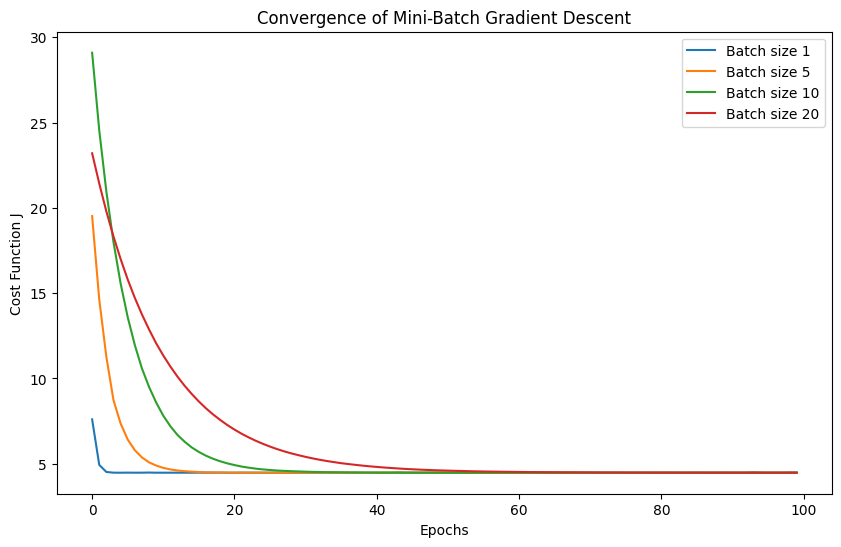

In [43]:
#normalize
X = (X - np.mean(X)) / np.std(X)

X = np.hstack((np.ones((X.shape[0], 1)), X))

theta = np.random.randn(2, 1)

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, alpha=0.01, batch_size=10, epochs=100):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)  # Shuffle data
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i : i + batch_size]
            y_batch = y_shuffled[i : i + batch_size]

            # Compute gradient
            predictions = X_batch @ theta
            gradient = (1 / len(y_batch)) * (X_batch.T @ (predictions - y_batch))

            # Update parameters
            theta -= alpha * gradient

        # Store cost function value after each epoch
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Train model for different batch sizes
batch_sizes = [1, 5, 10, 20]
cost_histories = {}

for batch_size in batch_sizes:
    theta = np.random.randn(2, 1)  # Reinitialize theta
    _, cost_history = mini_batch_gradient_descent(X, y, theta, batch_size=batch_size)
    cost_histories[batch_size] = cost_history

# Plot cost function for different batch sizes
plt.figure(figsize=(10, 6))
for batch_size, cost_history in cost_histories.items():
    plt.plot(cost_history, label=f"Batch size {batch_size}")

plt.xlabel("Epochs")
plt.ylabel("Cost Function J")
plt.title("Convergence of Mini-Batch Gradient Descent")
plt.legend()
plt.show()


###What happens when you use batch size equal to one?
The cost function converges slower and is more noisy.



## Question 3